# Code examples for the lecture block *Deep Neural Networks*

## 1. Hat function

We first have a look at the hat-function construction using ReLU neurons. The following code implements the construction discussed in the lecture.

In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
np.random.seed(424242)

# ReLU activation function
def ReLU(x):
  return np.maximum(0, x)

# Hat function defined using ReLUs
def Hat(x, noise=0):
  w0,w1,w2,w3 = 1,2,1,2
  b0,b1,b2,b3 = 0,-0.5,-1,0
  if noise > 0:
    w0 += np.random.normal(0, noise)
    w1 += np.random.normal(0, noise)
    w2 += np.random.normal(0, noise)
    w3 += np.random.normal(0, noise)
    b0 += np.random.normal(0, noise)
    b1 += np.random.normal(0, noise)
    b2 += np.random.normal(0, noise)
    b3 += np.random.normal(0, noise)
  return w3*(w0*ReLU(x+b0) - w1*ReLU(x+b1) + w2*ReLU(x+b2))+b3

# Stack hat functions = construct deep neural network
# This is the sawtooth function
def stack_hats(x, num, noise=0):
  out = Hat(x, noise)
  for i in range(num-1):
    out = Hat(out, noise)
  return out

Let's have a look at the sawtooth function! We obtain it by stacking the hat function. How often we stack is can be changed via *how_often_to_stack_the_hat*.

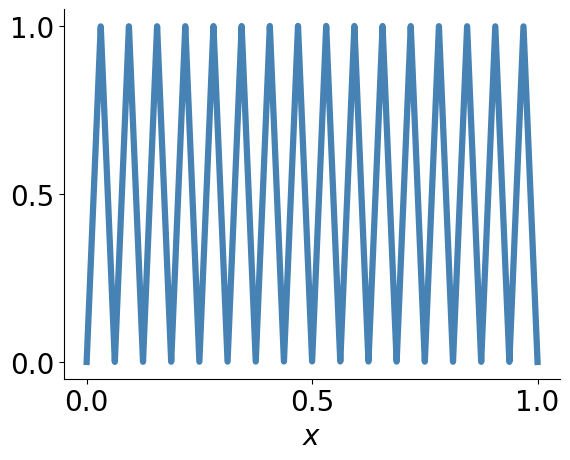

In [28]:
how_often_to_stack_the_hat = 5

xran = np.linspace(0,1,10000)
plt.plot(xran, stack_hats(xran, how_often_to_stack_the_hat, noise=0.), linewidth=4.5, color = 'steelblue')
sns.despine()

# increase tik sizes on axis
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

# set xticks by hand
_= plt.xticks([0, 0.5, 1], fontsize=20)
_= plt.yticks([0, 0.5, 1])
_= plt.xlabel(r'$x$',fontsize=20)

Note that such network, when very deep, possess exponentially many affine pieces. However, this is quite a delicate configuration. If we perturb the parameters a bit, the number of pieces drops by a lot!

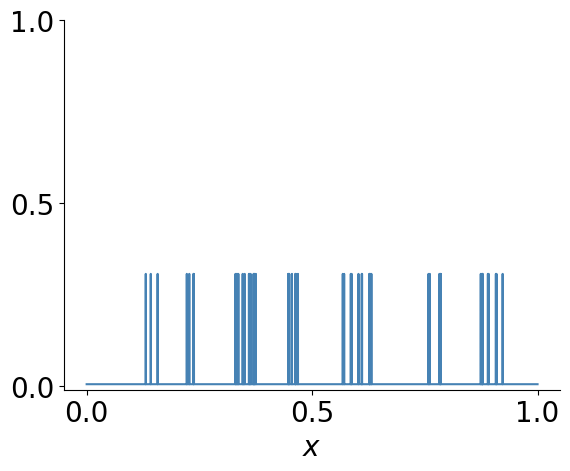

In [29]:
how_often_to_stack_the_hat = 30
noise_level = 0.1

xran = np.linspace(0,1,10000)
plt.plot(xran, stack_hats(xran, how_often_to_stack_the_hat, noise=noise_level), color = 'steelblue')
sns.despine()

# increase tik sizes on axis
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

# set xticks by hand
_= plt.xticks([0, 0.5, 1], fontsize=20)
_= plt.yticks([0, 0.5, 1])
_= plt.xlabel(r'$x$',fontsize=20)

## 2. Square function

Using the hat sawtooth function, we can construct a linear interpolation of the square function.

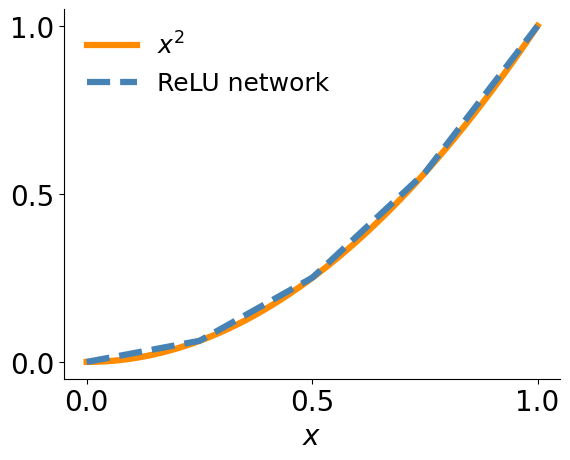

In [30]:
# Square func
def square_function(x, num, noise=0):
    out = x
    for i in range(1, num+1):
        out = out - stack_hats(x, i, noise)/4**i
    return out

num_stacks = 2

xran = np.linspace(0,1,10000)
plt.plot(xran, xran**2, linewidth=4.5, color = 'darkorange', label = r'$x^2$')
plt.plot(xran, square_function(xran, num = num_stacks, noise=0.), linewidth=4.5, color = 'steelblue',  linestyle = '--', label = 'ReLU network')
plt.legend(frameon=False, fontsize=18)
sns.despine()

# increase tik sizes on axis
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

# set xticks by hand
_= plt.xticks([0, 0.5, 1], fontsize=20)
_= plt.yticks([0, 0.5, 1])
_= plt.xlabel(r'$x$',fontsize=20)

Note that our approximation of the square function scales exponentially with the number of stacked hat functions used.

The y-axis is in log-scale. Since we observe a line, the relationship is $\mathrm{log} \epsilon \propto  -n$, i.e., $\epsilon \propto e^{-n}$. 

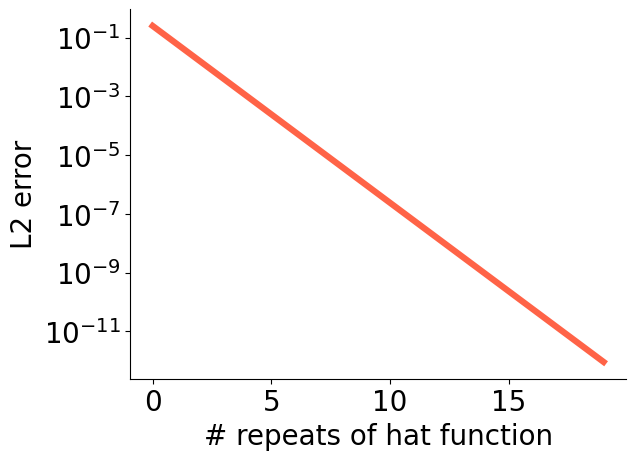

In [35]:
error_rate = []

# get error for different number of stacks
# i is the number of stacks
for i in range(20):
    out = square_function(xran, i)
    error_rate.append(np.max(np.fabs((out - xran**2))))

plt.plot(error_rate, linewidth = 4.5, color = 'tomato')
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
sns.despine()
_ = plt.ylabel('L2 error', fontsize=20)
_ = plt.xlabel('# repeats of hat function', fontsize=20)

## 3. Multiplication

Using the square function, we can efficiently construct a circuit that performs multiplication! This way, we can efficiently build deep ReLU neural networks for polynomials, Taylor expansions, etc.

We illustrate this here for $x^3 = x^2 \cdot x$.

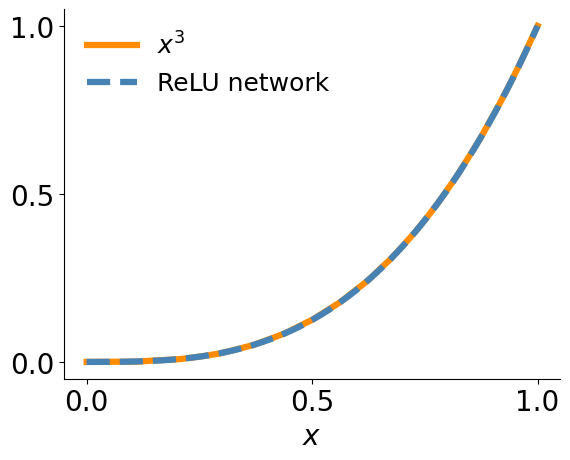

In [34]:
# Multiplication implemented using the polarization identity
def mult(x,y, num, noise=0):
    out = square_function(x, num, noise)
    out = (square_function((x+out)/2, num, noise) - square_function((x-out)/2, num, noise))
    return out

# Example for x^3
plt.plot(xran, mult(xran, xran, 4, noise=0.), linewidth = 4.5, color = 'darkorange', label = r'$x^3$')
plt.plot(xran, xran**3, linewidth = 4.5, color = 'steelblue', linestyle = '--', label = 'ReLU network')
plt.legend(frameon=False, fontsize=18)
sns.despine()

# increase tik sizes on axis
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

# set xticks by hand
_= plt.xticks([0, 0.5, 1], fontsize=20)
_= plt.yticks([0, 0.5, 1])
_ = plt.xlabel(r'$x$', fontsize=20)

## 4. Automatic differentiation

In the following, a brief custom implementation of automatic differentiation is provided (play around with it!)

This is adapted Andrej Karpathy's Mircrograd - Automatic Differentiation - Pytorch Foundation tutorial

https://colab.research.google.com/drive/1hdlf2XCrZxtiVp6hFSbgONAPT-l8CWn3?usp=sharing#scrollTo=kE112aYojFu8

https://www.youtube.com/watch?v=kCtCLjf1RVs

There are two key ideas:

1. Every node in is represented by a function implementing a basic operation. We use the *Value* class for this. Both forward and backward direction are implemented per node.
2. We then concatenate nodes to construct the graph.

In [36]:
# We represent each node using the Value class

class Value:
  def __init__(self, data, _children=(), _op=''):
    # the value used in forward
    self.data = data
    # the gradient, calculated using automatic differentiation
    self.grad = 0.0
    # the backward function used to calculate the gradient this node 
    # propagates backwards
    self._backward = lambda: None
    # the previous nodes connecting to this one
    self._prev = set(_children)
    # plain text representation of the operation this node performs
    self._op = _op

  # Implementation of addition
  def __add__(self, other):
    # Forward function
    out = Value(self.data + other.data, (self, other), '+')

    # Backward function
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  # Implementation of multiplication
  def __mul__(self, other):
    # Forward function
    out = Value(self.data * other.data, (self, other), '*')

    # Backward function
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out
  
  # Unroll backward functions through the graph
  # I.e., from the last node, call all backward functions
  # in sequence to calculate all gradients
  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

  # Reset the grad of all nodes
  def zerograd(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    self.grad = 1.0
    for node in reversed(topo):
      node.grad = 0

An example is shown below for a few basic operations.

In [37]:
# initial values
x = Value(2.0)
y = Value(4.0)
z = Value(2.0)

# forward calculation
xx = x * x 
xy = x * y 
xxxy = xx + xy 
xxxyz = xxxy + z

# backward calculation
xxxyz.grad = 1.
xxxyz._backward()
xxxy._backward()
xy._backward()
xx._backward()

print('Gradients: x = %.3f, y = %.3f, z = %.3f' % (x.grad, y.grad, z.grad))

Gradients: x = 8.000, y = 2.000, z = 1.000


Alternatively, we can just call the .backward() function of the last node to get the gradients:

In [38]:
xxxyz.zerograd()
xxxyz.backward()

print('Gradients: x = %.3f, y = %.3f, z = %.3f' % (x.grad, y.grad, z.grad))

Gradients: x = 8.000, y = 2.000, z = 1.000


To build a neural network, the only missing operation is the activation function! We add it below :)

In [39]:
class ValueNN(Value):
  
  def __init__(self, data, _children=(), _op=''):
    super().__init__(data, _children, _op)

  def ReLU(self):
    x = self.data
    t = (out > 0) * x
    out = Value(t, (self, ), 'ReLU')

    def _backward():
      self.grad += (t>0) * out.grad
    out._backward = _backward

    return out